In [1]:
!pip install gql

In [2]:
get_ipython().system(' pip install yelp')

In [225]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import sin, cos, sqrt, atan2, radians
from pprint import pprint
from yelp.client import Client
from yelp_api_key import yelp_client_id
from yelp_api_key import yelp_api_key
from urllib.parse import quote



%matplotlib notebook

from pandas.io.json import json_normalize

API_KEY = yelp_api_key
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.

DEFAULT_TERM = "restaurants"
DEFAULT_LOCATION = "1734 E 41st St. Los Angeles, CA"
DEFAULY_DISTANCE = 5
SEARCH_LIMIT = 50

def request(host, path, api_key, url_params=None):
    
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    print(u'Querying {0} ...'.format(url))
    response = requests.request('GET', url, headers=headers, params=url_params)
    return response.json()

response = request(host=API_HOST,
                  path=SEARCH_PATH,
                  api_key=API_KEY,
                  url_params={"location":DEFAULT_LOCATION, "term":DEFAULT_TERM, "limit": SEARCH_LIMIT})

pprint(response, indent = 4)

# df = pd.DataFrame.from_dict(json_normalize(response), orient='columns')

# df.head()   

Querying https://api.yelp.com/v3/businesses/search ...
{   'businesses': [   {   'alias': 'trattoria-25-restaurant-vernon',
                          'categories': [   {   'alias': 'italian',
                                                'title': 'Italian'},
                                            {   'alias': 'venues',
                                                'title': 'Venues & Event '
                                                         'Spaces'}],
                          'coordinates': {   'latitude': 34.014241,
                                             'longitude': -118.2305961},
                          'display_phone': '(323) 587-1494',
                          'distance': 1258.2412402252126,
                          'id': '4fjCNwFoUFZqBqwBCbRoXg',
                          'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/MBd3A2bgY3TuruLohV2PTg/o.jpg',
                          'is_closed': False,
                          'location': {   'address1':

                                                'title': 'American (New)'}],
                          'coordinates': {   'latitude': 34.048111,
                                             'longitude': -118.258345},
                          'display_phone': '(213) 372-5335',
                          'distance': 4747.885552096224,
                          'id': '_n0fEUZdbkLOimHz_IXkiQ',
                          'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/vpOlQo1EtUEnnBQaTiukzA/o.jpg',
                          'is_closed': False,
                          'location': {   'address1': '700 W 7th St',
                                          'address2': 'Ste S430',
                                          'address3': None,
                                          'city': 'Los Angeles',
                                          'country': 'US',
                                          'display_address': [   '700 W 7th St',
                                                 

                          'display_phone': '(323) 484-9640',
                          'distance': 6181.987757964647,
                          'id': 'H_-iuDBWCiQws81LHtHbTg',
                          'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/mxbEFDgyyJsd2ZHCwhvAqg/o.jpg',
                          'is_closed': False,
                          'location': {   'address1': '6626 Atlantic Ave',
                                          'address2': None,
                                          'address3': '',
                                          'city': 'Bell',
                                          'country': 'US',
                                          'display_address': [   '6626 '
                                                                 'Atlantic Ave',
                                                                 'Bell, CA '
                                                                 '90201'],
                                          'state': 

                          'categories': [   {'alias': 'bars', 'title': 'Bars'},
                                            {   'alias': 'izakaya',
                                                'title': 'Izakaya'}],
                          'coordinates': {   'latitude': 34.0501189106436,
                                             'longitude': -118.241461110451},
                          'display_phone': '(213) 625-1722',
                          'distance': 4717.545793257703,
                          'id': 'OowWjnNFs-Lfw0Kfx8GmJw',
                          'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/I9lHtbo90sJ7llx3KZMKqg/o.jpg',
                          'is_closed': False,
                          'location': {   'address1': '111 S San Pedro St',
                                          'address2': '',
                                          'address3': '',
                                          'city': 'Los Angeles',
                                       

                          'location': {   'address1': '1098 E 41st St',
                                          'address2': '',
                                          'address3': '',
                                          'city': 'Los Angeles',
                                          'country': 'US',
                                          'display_address': [   '1098 E 41st '
                                                                 'St',
                                                                 'Los Angeles, '
                                                                 'CA 90011'],
                                          'state': 'CA',
                                          'zip_code': '90011'},
                          'name': 'Super Tortas DF',
                          'phone': '+13233518379',
                          'price': '$',
                          'rating': 4.5,
                          'review_count': 154,
                         

In [226]:
lat = []
lon = []
business_name =[]
price = []
category = []
transactions = []
rating = []
review_count = []

for i in range(50):
    try:
        lat.append(response["businesses"][i]["coordinates"]["latitude"])
        lon.append(response["businesses"][i]["coordinates"]["longitude"])
        business_name.append(response['businesses'][i]['name'])
        price.append(response['businesses'][i]['price'])
        category.append(response['businesses'][i]['categories'][0]['title'])
        transactions.append(response['businesses'][i]['transactions'])
        rating.append(response['businesses'][i]['rating'])
        review_count.append(response['businesses'][i]['review_count'])
    except:
        price.append("NaN")
        category.append(np.NaN)
        transactions.append(np.NaN)
        rating.append(np.NaN)
        review_count.append(np.NaN)
        pass
    continue
    
   
print(f"{len(lat)}")
print(f"{len(lon)}")
print(f"{len(business_name)}") 
print(f"{len(price)}") 
print(f"{len(category)}")
print(f"{len(transactions)}")
print(f"{len(rating)}")
print(f"{len(review_count)}")

50
50
50
50
50
50
50
50


In [227]:
print(json.dumps(response, indent = 4, sort_keys = True))

{
    "businesses": [
        {
            "alias": "trattoria-25-restaurant-vernon",
            "categories": [
                {
                    "alias": "italian",
                    "title": "Italian"
                },
                {
                    "alias": "venues",
                    "title": "Venues & Event Spaces"
                }
            ],
            "coordinates": {
                "latitude": 34.014241,
                "longitude": -118.2305961
            },
            "display_phone": "(323) 587-1494",
            "distance": 1258.2412402252126,
            "id": "4fjCNwFoUFZqBqwBCbRoXg",
            "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/MBd3A2bgY3TuruLohV2PTg/o.jpg",
            "is_closed": false,
            "location": {
                "address1": "2501 S Santa Fe Ave",
                "address2": "",
                "address3": null,
                "city": "Vernon",
                "country": "US",
                "display_ad

In [228]:
total_data = {"Latitude": lat, 
             "Longitude": lon, 
             "Restaurant Name": business_name, 
             "Category": category, 
             "Transactions": transactions, 
             "Rating": rating, 
             "Price Tag":price,
             "Review": review_count,
             }

total_data_df_rename = pd.DataFrame(total_data)
total_data_df_rename_sorted = total_data_df_rename.sort_values(by=["Review"], ascending=True).reset_index(drop=True)

total_data_df_rename_sorted

,Latitude,Longitude,Restaurant Name,Category,Transactions,Rating,Price Tag,Review
0,34.012900,-118.256170,Los Amigos Restaurant Salvadoreno,Salvadoran,[],4.5,$,4.0
1,34.002441,-118.240555,El Buca Restaurant,Seafood,[],5.0,$,16.0
2,33.975575,-118.186979,Nina’s Cafe Bar,French,[restaurant_reservation],4.5,$$,26.0
3,34.042526,-118.263324,The Stanton DTLA,American (New),[restaurant_reservation],4.5,$$,50.0
4,34.061610,-118.299640,Dave's Hot Chicken,Chicken Shop,[],4.0,$$,53.0
5,34.006680,-118.256650,Delicious At The Dunbar,Soul Food,[delivery],4.0,$$,58.0
6,34.009528,-118.219584,The Green Olive,Mediterranean,"[delivery, pickup]",4.0,$$,65.0
7,33.988513,-118.199956,Rajas con Crema,New Mexican Cuisine,"[delivery, pickup, restaurant_reservation]",5.0,$$,81.0
8,34.007817,-118.219879,Z's Place,American (Traditional),[delivery],4.0,$$,89.0
9,34.009095,-118.256683,Super Tortas DF,Food Trucks,[],4.5,$,154.0


In [229]:
#approximate radius of earth in miles
r = 3958.8

food_bank_lat = radians(34.007839)
food_bank_lon = radians(-118.241728)

lat1 = radians(34.002441)
lon1 = radians(-118.240555)


distance_lat = food_bank_lat - lat1
distance_lon = food_bank_lon - lon1

a = sin(distance_lat / 2)**2 + cos(lat1) * cos(food_bank_lat) * sin(distance_lon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = r * c

print(f"The distance is:{round(distance,4)} mi")

The distance is:0.379 mi


In [230]:
r = 3958.8

food_bank_lat = radians(34.007839)
food_bank_lon = radians(-118.241728)

distance_in_mi = []

for i in range(50):
    distance_lat = (food_bank_lat) - (radians(total_data_df_rename_sorted["Latitude"][i]))
    distance_lon = (food_bank_lon) - (radians(total_data_df_rename_sorted["Longitude"][i]))
    
    a = sin(distance_lat / 2)**2 + cos(radians(total_data_df_rename_sorted["Latitude"][i])) * cos(food_bank_lat) * sin(distance_lon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = r*c
    
    distance_mi = f"{round(distance, 3)}mi"
    distance_in_mi.append(distance_mi)
    
print(distance_in_mi)


['0.898mi', '0.379mi', '3.848mi', '2.697mi', '4.98mi', '0.858mi', '1.274mi', '2.74mi', '1.251mi', '0.861mi', '0.444mi', '3.065mi', '1.362mi', '2.828mi', '0.776mi', '2.919mi', '1.317mi', '1.607mi', '1.356mi', '2.126mi', '3.009mi', '2.508mi', '1.619mi', '2.921mi', '3.173mi', '2.969mi', '2.384mi', '2.934mi', '2.169mi', '2.95mi', '2.485mi', '2.844mi', '2.712mi', '2.529mi', '2.988mi', '3.076mi', '2.382mi', '3.261mi', '2.886mi', '2.916mi', '1.946mi', '2.895mi', '2.629mi', '2.806mi', '1.79mi', '2.941mi', '1.925mi', '1.992mi', '2.785mi', '4.339mi']


In [243]:
distance_df = pd.DataFrame({"Restaurant Name": business_name, 
                            "Distance to Food Bank(mi)": distance_in_mi, 
                            "Review Count":review_count
                           })
distance_df_sorted = distance_df.sort_values(by=["Distance to Food Bank(mi)"], ascending=True).reset_index(drop=True)
distance_df_sorted

,Restaurant Name,Distance to Food Bank(mi),Review Count
0,Bestia,0.379mi,6072.0
1,The Ricans Food,0.444mi,NaN
2,Hana Teppanyaki,0.776mi,NaN
3,Rajas con Crema,0.858mi,81.0
4,Perch,0.861mi,7646.0
5,Trattoria 25 Restaurant,0.898mi,239.0
6,Rays BBQ,1.251mi,753.0
7,JOEY DTLA,1.274mi,NaN
8,Father’s Office,1.317mi,NaN
9,The Burrow,1.356mi,257.0


<IPython.core.display.Javascript object>


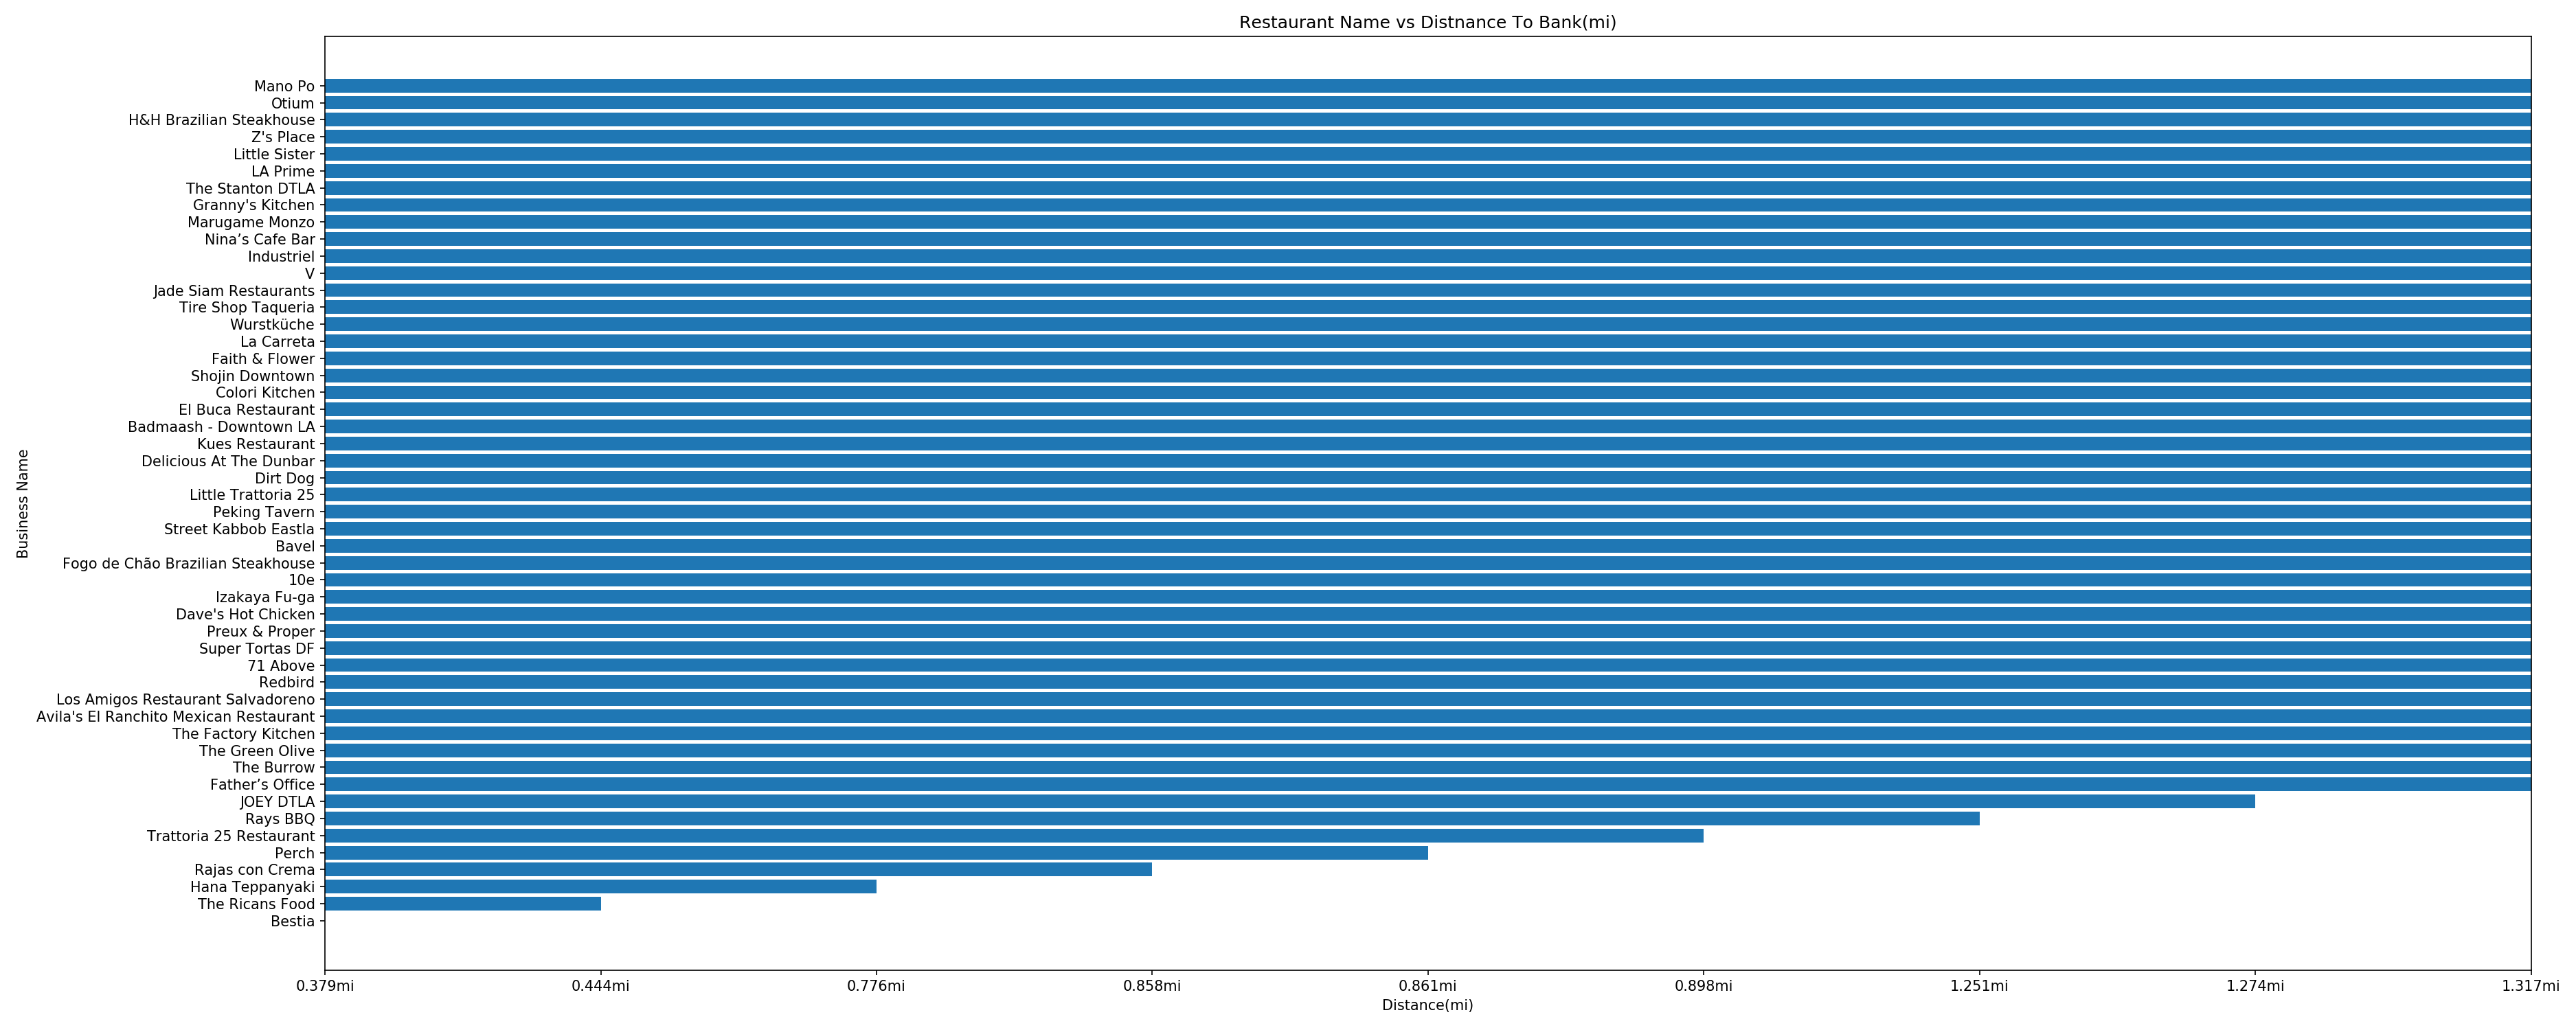

In [242]:
fig, ax4 = plt.subplots(figsize=(25, 10))

distance_plot_4 = distance_df_sorted["Distance to Food Bank(mi)"]
business_name_plot_4 = distance_df_sorted["Restaurant Name"]

ax4.barh(business_name_plot_4, distance_plot_4)

ax4.set_title("Restaurant Name vs Distnance To Bank(mi)")
ax4.set_xlabel("Distance(mi)")
ax4.set_ylabel("Business Name")

# ax4.xaxis.set_tick_params(rotation=90)

ax4.set_xlim(0,8)

fig.tight_layout()

fig.savefig("../Project 1/Plot_4.png")

In [232]:
total_data_df_rename_sorted.describe()

,Latitude,Longitude,Rating,Review
count,50.000000,50.000000,43.000000,43.000000
mean,34.029029,-118.243830,4.197674,1305.906977
std,0.024615,0.021644,0.329854,1875.051641
min,33.975575,-118.299640,3.500000,4.000000
25%,34.009203,-118.256463,4.000000,171.000000
50%,34.042408,-118.249638,4.000000,745.000000
75%,34.048023,-118.233034,4.500000,1594.000000
max,34.061610,-118.167048,5.000000,8279.000000


In [233]:
distance_to_foodbank_df_sorted["Distance To Food Bank(mi)"].describe()

count          50
unique         49
top       1.317mi
freq            2
Name: Distance To Food Bank(mi), dtype: object

<IPython.core.display.Javascript object>


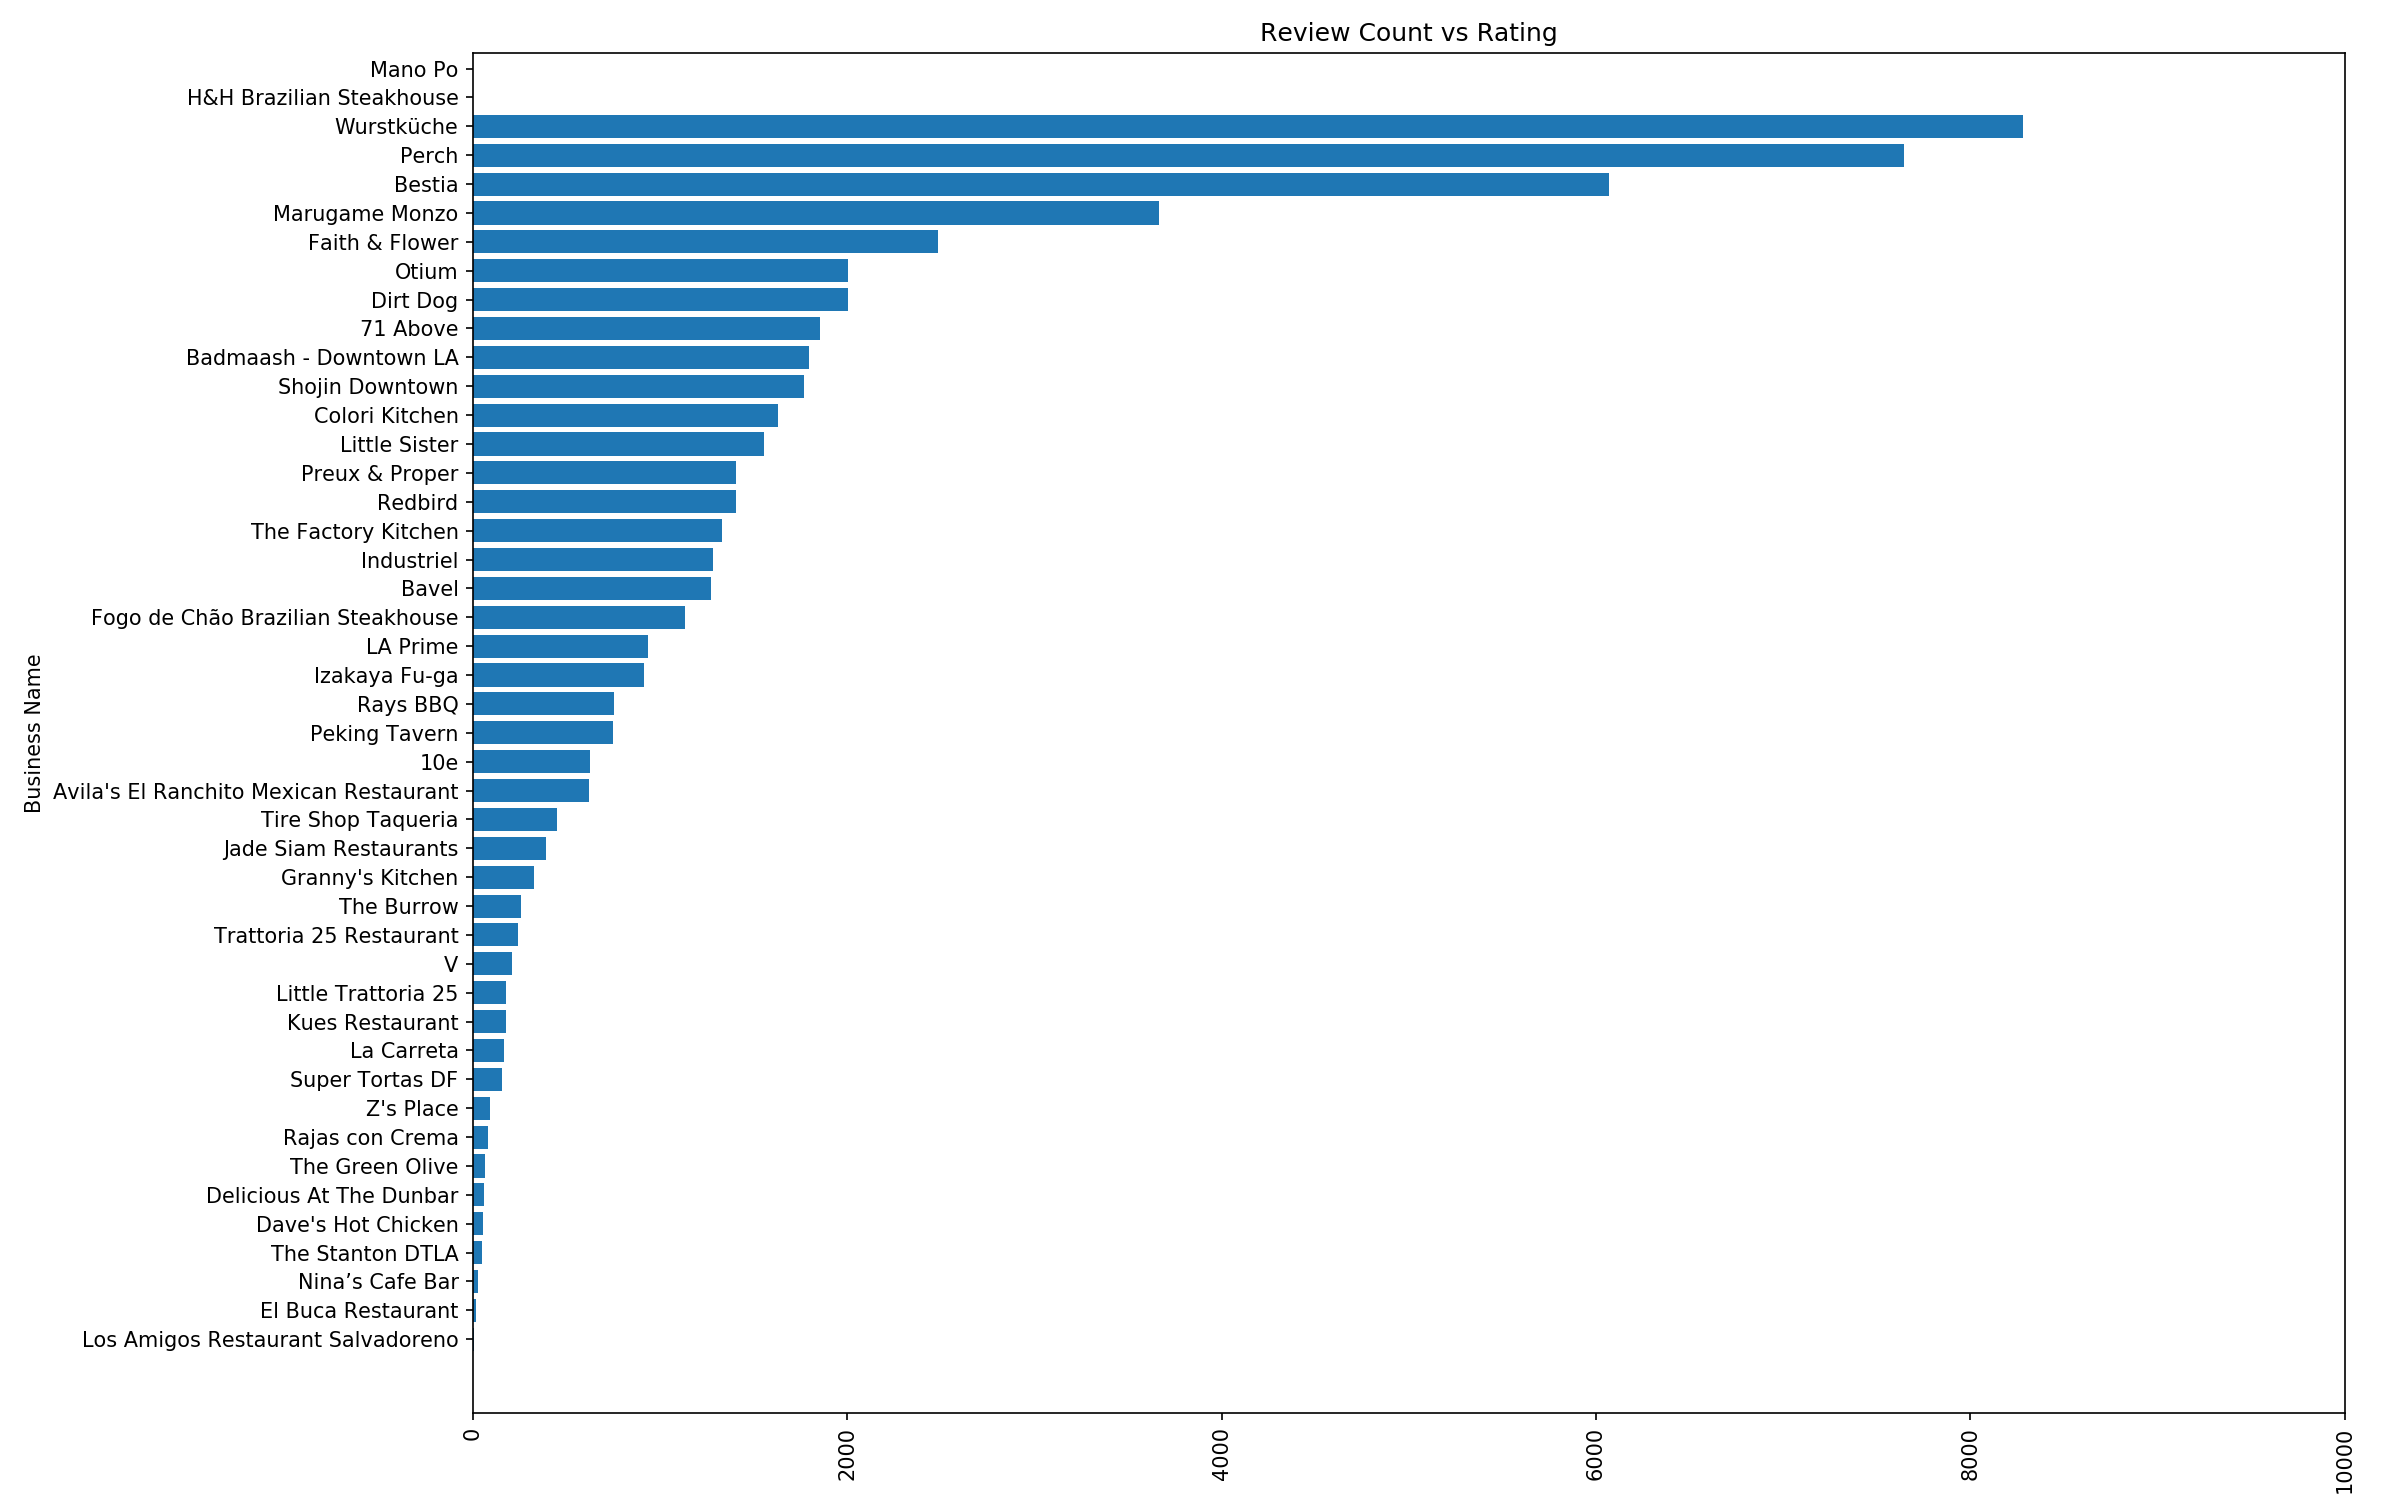

In [234]:
fig, ax = plt.subplots(figsize=(16, 10))

# rating_plot = total_data_df["Rating"]
review_plot = total_data_df_rename_sorted["Review"]
business_name_plot = total_data_df_rename_sorted["Restaurant Name"]

ax.barh(business_name_plot,review_plot)
ax.set_xlabel("Review Count")
ax.set_ylabel("Business Name")

ax.set_xlim(0,10000)

# ax.xaxis.set_tick_params(rotation=90)
ax.set_title("Review Count vs Business Name")

fig.tight_layout()

fig.savefig("../Project 1/Plot_1.png")

<IPython.core.display.Javascript object>


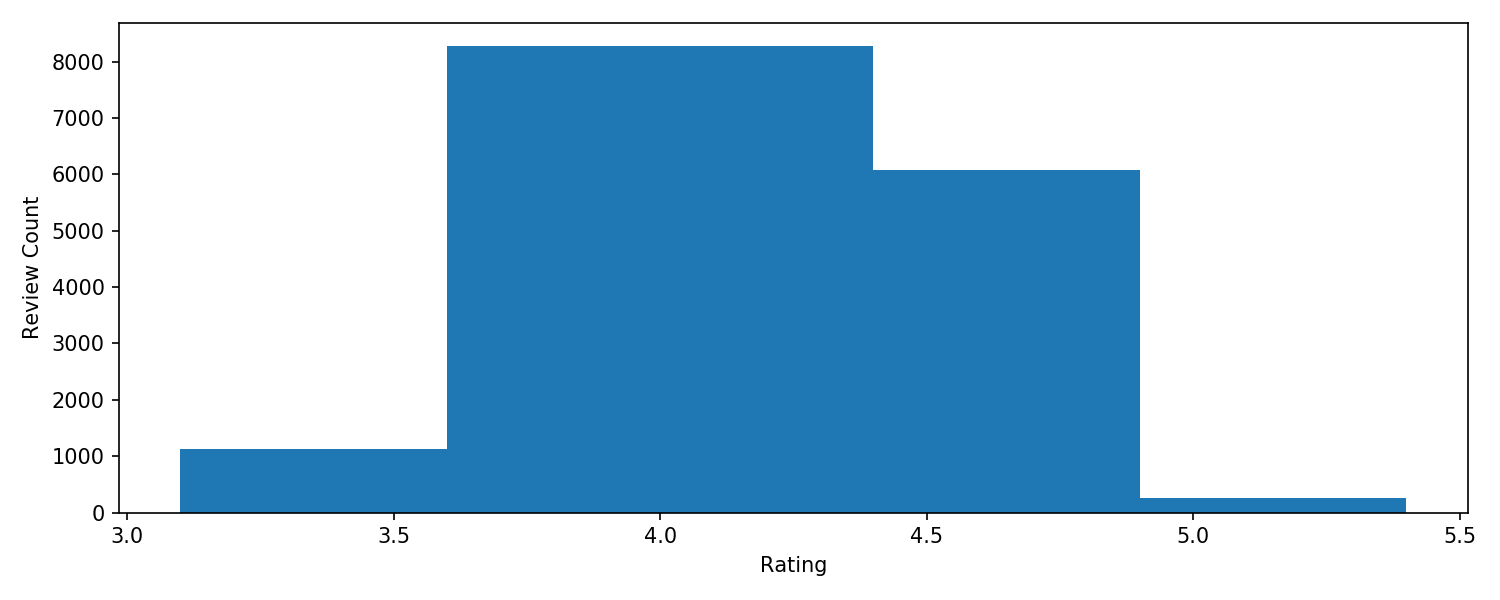

In [244]:
fig, ax2 = plt.subplots(figsize=(10, 4))

rating_plot = total_data_df_rename_sorted["Rating"]
review_plot = total_data_df_rename_sorted["Review"]
business_name_plot = total_data_df_rename_sorted["Restaurant Name"]

ax2.bar(rating_plot,review_plot)
ax2.set_ylabel("Review Count")
ax2.set_xlabel("Rating")


# ax.set_xlim(0,20000)

ax.xaxis.set_tick_params(rotation=90)
ax.set_title("Review Count vs Rating")

fig.tight_layout()

fig.savefig("../Project 1/Plot_2.png")

In [245]:
A = []
B = []
C = []
D = []

for i in range(50):
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-245-8d08c3179674>, line 7)